# IBM HR Employee Attrition Analysis

## 1. Understand the problem and Object
#### Object
Uncover the factors that lead to employee attrition

#### Dataset
The dataset contain 35 features along with Attrition target variable. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve

In [2]:
# import data
df = pd.read_csv('/Users/carina/Desktop/Employee attrition/IBM_HR_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. Understand the Data

In [3]:
# Deal with missing value
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis = 1)
df.shape

(1470, 31)

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [7]:
# distribution of attrition
df['Attrition'].value_counts()/df.shape[0]

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Text(0.5,1,'Employee Attrition vs Frequency of Business Travel')

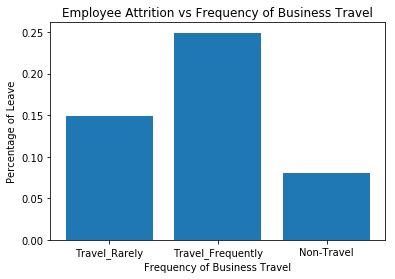

In [8]:
# Employee Attrition vs Frequency of Business Travel

travel_yes = pd.DataFrame(df.loc[df['Attrition'] == 'Yes'].BusinessTravel.value_counts())
total_travel = pd.DataFrame(df.BusinessTravel.value_counts())
travel_attrition = pd.merge(travel_yes,total_travel, left_index=True, right_index=True)
travel_attrition['Percentage_left'] = travel_attrition['BusinessTravel_x']/travel_attrition['BusinessTravel_y']

plt.bar(travel_attrition.index,travel_attrition['Percentage_left'],align = 'center')
plt.xlabel("Frequency of Business Travel")
plt.ylabel("Percentage of Leave")
plt.title('Employee Attrition vs Frequency of Business Travel')

Text(0.5,1,'Employee Attrition vs Department')

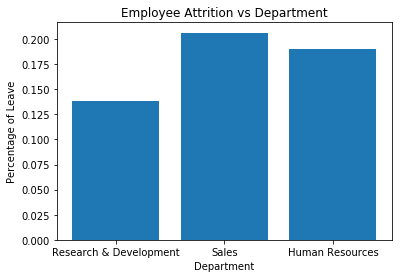

In [9]:
# Employee Attrition vs Department: sales department has hign attrition

dpt_yes = pd.DataFrame(df.loc[df['Attrition'] == 'Yes'].Department.value_counts())
total_dpt = pd.DataFrame(df.Department.value_counts())
dpt_attrition = pd.merge(dpt_yes,total_dpt, left_index=True, right_index=True)
dpt_attrition
dpt_attrition['Percentage_left'] = dpt_attrition['Department_x']/dpt_attrition['Department_y']

plt.bar(dpt_attrition.index,dpt_attrition['Percentage_left'],align = 'center')
plt.xlabel("Department")
plt.ylabel("Percentage of Leave")
plt.title('Employee Attrition vs Department')

Text(0.5,1,'Employee Attrition vs Education')

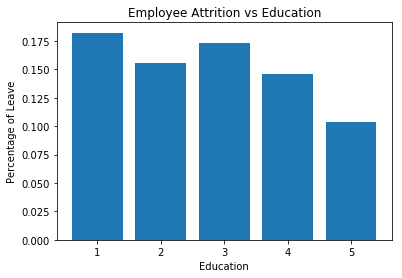

In [10]:
# Employee Attrition vs Education:1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

edu_yes = pd.DataFrame(df.loc[df['Attrition'] == 'Yes'].Education.value_counts())
total_edu = pd.DataFrame(df.Education.value_counts())
edu_attrition = pd.merge(edu_yes,total_edu, left_index=True, right_index=True)
edu_attrition['Percentage_left'] = edu_attrition['Education_x']/edu_attrition['Education_y']

plt.bar(edu_attrition.index,edu_attrition['Percentage_left'],align = 'center')
plt.xlabel("Education")
plt.ylabel("Percentage of Leave")
plt.title('Employee Attrition vs Education')

Text(0.5,1,'Employee Attrition vs Stock Option Level')

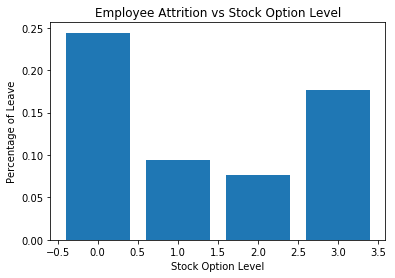

In [11]:
# Employee Attrition vs Stock Option Level

stock_yes = pd.DataFrame(df.loc[df['Attrition'] == 'Yes'].StockOptionLevel.value_counts())
total_stock = pd.DataFrame(df.StockOptionLevel.value_counts())
stock_attrition = pd.merge(stock_yes,total_stock, left_index=True, right_index=True)
stock_attrition['Percentage_left'] = stock_attrition['StockOptionLevel_x']/stock_attrition['StockOptionLevel_y']

plt.bar(stock_attrition.index,stock_attrition['Percentage_left'],align = 'center')
plt.xlabel("Stock Option Level")
plt.ylabel("Percentage of Leave")
plt.title('Employee Attrition vs Stock Option Level')

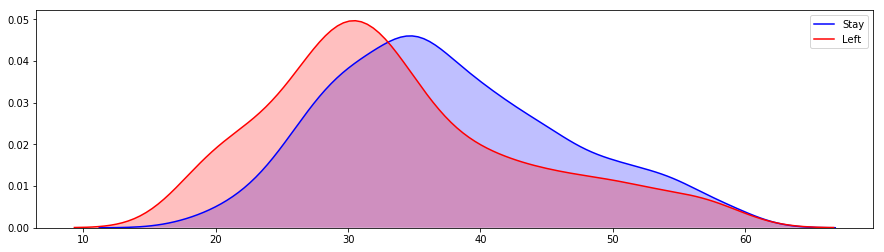

In [12]:
# Employee Attrition vs Age: Employees who are over 33 years old have low attrition
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'No'),'Age'] , color='b',shade=True, label='Stay')
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'Age'] , color='r',shade=True, label='Left')

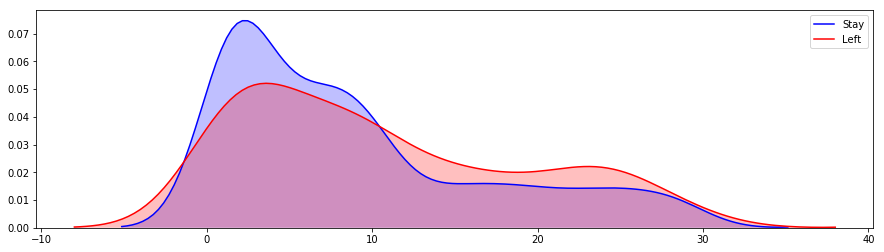

In [13]:
# Employee Attrition vs Distance from Home: Employees who live close to work have low attrition
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'No'),'DistanceFromHome'] , color='b',shade=True, label='Stay')
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'DistanceFromHome'] , color='r',shade=True, label='Left')

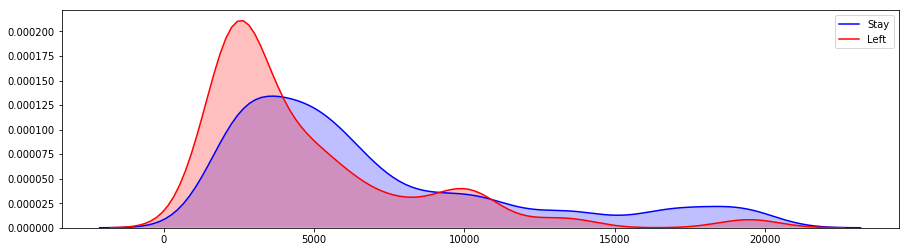

In [14]:
# Employee Attrition vs Monthly Income: Employees whose monthly income is below $5000 have high attrition.
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'No'),'MonthlyIncome'] , color='b',shade=True, label='Stay')
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'MonthlyIncome'] , color='r',shade=True, label='Left')

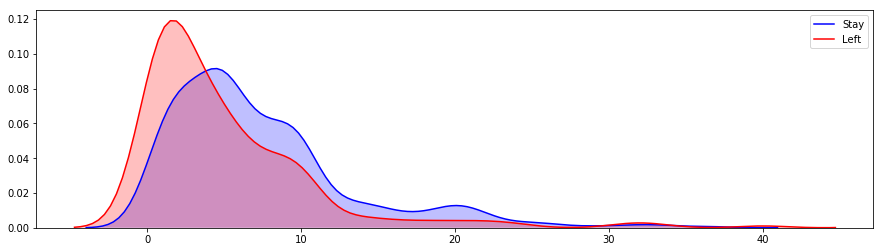

In [15]:
# Employee Attrition vs Years at Company: Employees who worked in the company below 3 years have high attrition.
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'No'),'YearsAtCompany'] , color='b',shade=True, label='Stay')
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'YearsAtCompany'] , color='r',shade=True, label='Left')

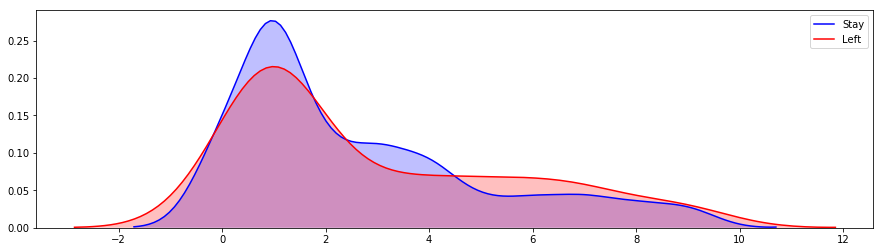

In [16]:
# Employee Attrition vs Num of Companies worked: the larger the number of companies worked, the higher the attrition probability.
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'No'),'NumCompaniesWorked'] , color='b',shade=True, label='Stay')
ax=sb.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'NumCompaniesWorked'] , color='r',shade=True, label='Left')

## 3. Prepare the Data

In [17]:
# Target
attrition = pd.DataFrame(df['Attrition'])
attrition[df.Attrition == 'Yes'] = 1
attrition[df.Attrition == 'No'] = 0
attrition = pd.Series(attrition['Attrition'])
attrition.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [18]:
# Numerical values
num = ['Age','DistanceFromHome','DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike',
       'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
       'TrainingTimesLastYear','NumCompaniesWorked']
num_df1 = df[num]
num_df1.head()

,Age,DistanceFromHome,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,NumCompaniesWorked
0,41,1,1102,94,19479,5993,11,8,6,4,0,5,0,8
1,49,8,279,61,24907,5130,23,10,10,7,1,7,3,1
2,37,2,1373,92,2396,2090,15,7,0,0,0,0,3,6
3,33,3,1392,56,23159,2909,11,8,8,7,3,0,3,1
4,27,2,591,40,16632,3468,12,6,2,2,2,2,3,9


In [19]:
num_df1.shape

(1470, 14)

In [42]:
num_df1.tail()

,Age,DistanceFromHome,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,NumCompaniesWorked,CompRatioOverall
1465,36,23,884,41,12290,2571,17,17,5,2,0,3,3,4,0.522667
1466,39,6,613,42,21457,9991,15,9,7,7,1,7,5,4,2.031104
1467,27,4,155,87,5174,6142,20,6,6,2,0,3,0,1,1.248628
1468,49,2,1023,63,13243,5390,14,17,9,6,0,8,3,2,1.095751
1469,34,8,628,82,10228,4404,12,6,4,3,1,2,3,2,0.895304


In [39]:
monthly_income_median = np.median(num_df1['MonthlyIncome'])
num_df1['CompRatioOverall'] = num_df1['MonthlyIncome'] / monthly_income_median

/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# Standardize data
scaler = preprocessing.StandardScaler().fit(num_df1)
num_df = pd.DataFrame(scaler.transform(num_df1))
num_df.columns = num
num_df.head()

,Age,DistanceFromHome,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,NumCompaniesWorked
0,0.446350,-1.010909,0.742527,1.383138,0.726020,-0.108350,-1.150554,-0.421642,-0.164613,-0.063296,-0.679146,0.245834,-2.171982,2.125136
1,1.322365,-0.147150,-1.297775,-0.240677,1.488876,-0.291719,2.129306,-0.164511,0.488508,0.764998,-0.368715,0.806541,0.155707,-0.678049
2,0.008343,-0.887515,1.414363,1.284725,-1.674841,-0.937654,-0.057267,-0.550208,-1.144294,-1.167687,-0.679146,-1.155935,0.155707,1.324226
3,-0.429664,-0.764121,1.461466,-0.486709,1.243211,-0.763634,-1.150554,-0.421642,0.161947,0.764998,0.252146,-1.155935,0.155707,-0.678049
4,-1.086676,-0.887515,-0.524295,-1.274014,0.325900,-0.644858,-0.877232,-0.678774,-0.817734,-0.615492,-0.058285,-0.595227,0.155707,2.525591


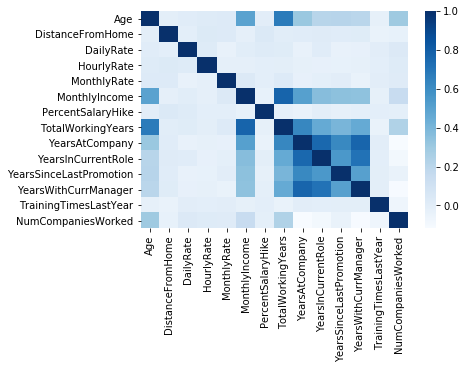

In [20]:
# Distribution of numeric variables
num_corr = num_df1.corr()
sb.heatmap(num_corr,cmap = 'Blues')

In [21]:
# Categorical variables: One Hot Coding
cat = df.drop(num,axis = 1).columns.tolist()
cat_df = df[cat]

for col in cat:
    col_dummies = pd.get_dummies(cat_df[col], prefix=col)
    cat_df = pd.concat([cat_df, col_dummies], axis=1)

cat_df.drop(cat, axis=1, inplace=True)

cat_df = cat_df.drop(['Attrition_No','Attrition_Yes'],axis = 1)
cat_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [22]:
# Construct new dataset
hr_df = pd.concat([cat_df,num_df],axis = 1)
hr_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,...,MonthlyRate,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,NumCompaniesWorked
0,0,0,1,0,0,1,0,1,0,0,...,0.726020,-0.108350,-1.150554,-0.421642,-0.164613,-0.063296,-0.679146,0.245834,-2.171982,2.125136
1,0,1,0,0,1,0,1,0,0,0,...,1.488876,-0.291719,2.129306,-0.164511,0.488508,0.764998,-0.368715,0.806541,0.155707,-0.678049
2,0,0,1,0,1,0,0,1,0,0,...,-1.674841,-0.937654,-0.057267,-0.550208,-1.144294,-1.167687,-0.679146,-1.155935,0.155707,1.324226
3,0,1,0,0,1,0,0,0,0,1,...,1.243211,-0.763634,-1.150554,-0.421642,0.161947,0.764998,0.252146,-1.155935,0.155707,-0.678049
4,0,0,1,0,1,0,1,0,0,0,...,0.325900,-0.644858,-0.877232,-0.678774,-0.817734,-0.615492,-0.058285,-0.595227,0.155707,2.525591


In [23]:
# Split training and testing data
x_train,x_test,y_train,y_test=train_test_split(hr_df,attrition,test_size=0.2,random_state=42)

## 4. Model Building and Evaluation

In [38]:
x_train.keys()

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'Gender_Female', 'Gender_Male', 'JobInvolvement_1', 'JobInvolvement_2',
       'JobInvolvement_3', 'JobInvolvement_4', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_

In [24]:
# ROC curve function
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [25]:
# Model training function
def evaluate_model(model,model_name,x_train,x_test,y_train,y_test):
    eva = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','f1_score','ROC_AUC'])
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    eva = eva.append({'Model':model_name,'Accuracy':accuracy_score(y_test,y_pred),
                      'Precision':precision_score(y_test,y_pred),'Recall':recall_score(y_test,y_pred),
                     'f1_score':f1_score(y_test,y_pred),'ROC_AUC':roc_auc_score(y_test,y_pred)},ignore_index=True)
    
    
    probs = model.predict_proba(x_test)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fpr, tpr)
    
    return eva

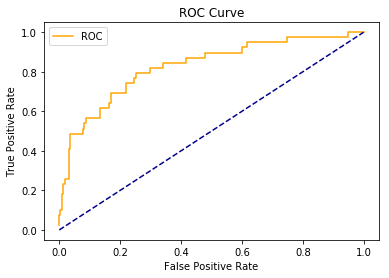

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Logistic Regression,0.891156,0.612903,0.487179,0.542857,0.72006


In [26]:
# Logistic Regression
lr = LogisticRegression()
logisticR = evaluate_model(lr,'Logistic Regression',x_train,x_test,y_train,y_test)
logisticR

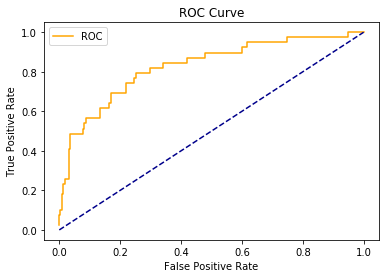

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Logistic Regression,0.891156,0.612903,0.487179,0.542857,0.72006


In [46]:
# Logistic Regression
lr = LogisticRegression()
logisticR = evaluate_model(lr,'Logistic Regression',x_train,x_test,y_train,y_test)
logisticR

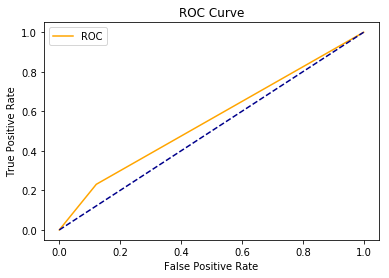

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Decision Tree,0.792517,0.225,0.230769,0.227848,0.5546


In [28]:
# Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced',)
DecisionTree = evaluate_model(dt,'Decision Tree',x_train,x_test,y_train,y_test)
DecisionTree

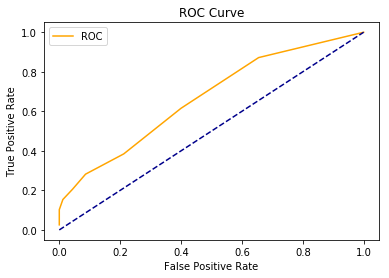

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Random Forest,0.877551,0.666667,0.153846,0.25,0.571041


In [29]:
# Random Forest
rf = RandomForestClassifier()
RandomForest = evaluate_model(rf,'Random Forest',x_train,x_test,y_train,y_test)
RandomForest

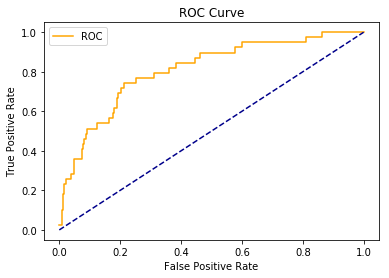

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,AdaBoost,0.863946,0.478261,0.282051,0.354839,0.617496


In [30]:
# AdaBoostClassifier
ad = AdaBoostClassifier()
AdaBoost = evaluate_model(ad,'AdaBoost',x_train,x_test,y_train,y_test)
AdaBoost

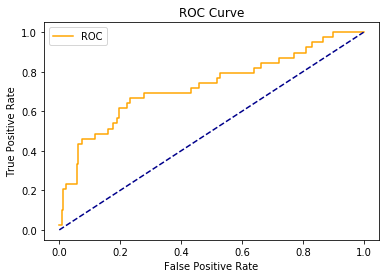

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Naive Bayes,0.697279,0.259615,0.692308,0.377622,0.695173


In [31]:
# Naive Bayes
nb = GaussianNB()
NB = evaluate_model(nb,'Naive Bayes',x_train,x_test,y_train,y_test)
NB

## 5. Logistic Regression

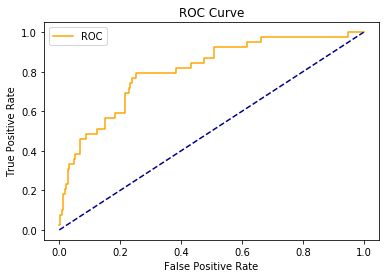

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Logistic Regression,0.765306,0.325581,0.717949,0.448,0.745249


In [33]:
# Logistic Regression
lr1 = LogisticRegression(class_weight = 'balanced')
LR = evaluate_model(lr1,'Logistic Regression',x_train,x_test,y_train,y_test)
LR

In [51]:
# Extract coefficient
coef = pd.DataFrame(lr.coef_[0],index = hr_df.columns,columns = ['Coefficient'])
coef['abs'] = coef['Coefficient'].abs()
coef_sort = coef.sort_values(by = 'abs', ascending=False)
coef_sort

,Coefficient,abs
OverTime_No,-1.249371,1.249371
JobLevel_2,-1.076688,1.076688
JobRole_Research Director,-1.047739,1.047739
JobInvolvement_1,1.009859,1.009859
JobLevel_4,-0.999727,0.999727
BusinessTravel_Non-Travel,-0.971660,0.971660
JobLevel_5,0.955373,0.955373
OverTime_Yes,0.946002,0.946002
JobInvolvement_4,-0.889818,0.889818
YearsAtCompany,0.801841,0.801841


In [69]:
top20 = coef_sort.head(20)

Text(0.5,1,'Top 20 Coefficient')

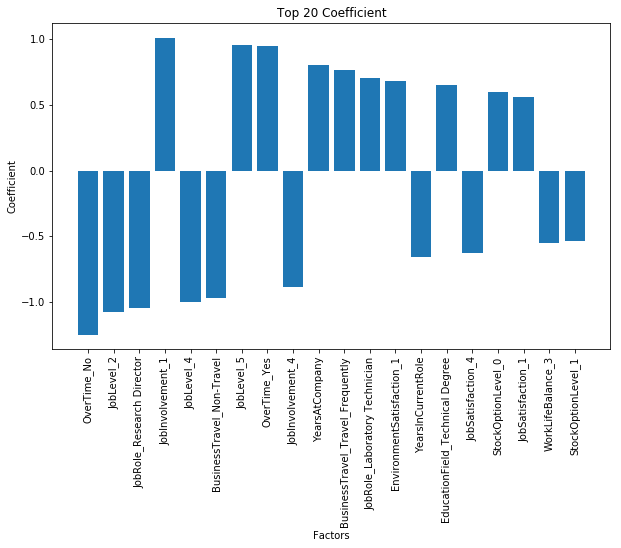

In [71]:
###### Feature selection
fig= plt.figure(figsize=(10,6))
plt.bar(top20.index,top20['Coefficient'],align = 'center')
plt.xticks(rotation = 90)
plt.xlabel("Factors")
plt.ylabel("Coefficient")
plt.title('Top 20 Coefficient')